In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Concatenate,Normalization,Input,LSTM
from tensorflow.keras import Model,Sequential
from tensorflow.keras.utils import plot_model

2025-02-15 22:59:49.548015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-15 22:59:49.756838: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-02-15 22:59:49.756863: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-02-15 22:59:52.009267: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-

In [2]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=1403)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=1403)

In [3]:
X_train.shape

(11610, 8)

In [4]:
normalization_layer = Normalization()
hidden_layer1 = Dense(30,activation='relu')
hidden_layer2 = Dense(30,activation='relu')
concat_layer = Concatenate()
output_layer = Dense(1)

input_= Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = Model(inputs = [input_], outputs = [output])

2025-02-15 23:00:03.614783: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-02-15 23:00:03.614813: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-15 23:00:03.614843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (milad-HP): /proc/driver/nvidia/version does not exist
2025-02-15 23:00:03.615440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


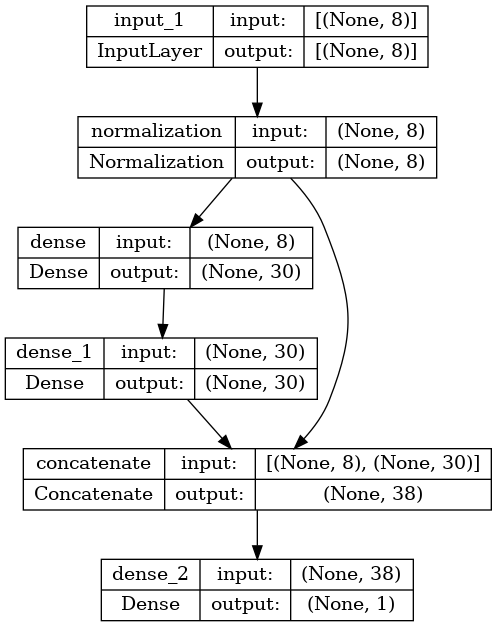

In [5]:
plot_model(model,show_shapes=True)

In [6]:
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)

In [7]:
history = model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_valid,y_valid))

Epoch 1/20
726/726 [==============================] - 4s 4ms/step - loss: 0.7737 - root_mean_squared_error: 0.8796 - val_loss: 0.4809 - val_root_mean_squared_error: 0.6935
Epoch 2/20
726/726 [==============================] - 3s 4ms/step - loss: 0.4483 - root_mean_squared_error: 0.6695 - val_loss: 0.4086 - val_root_mean_squared_error: 0.6392
Epoch 3/20
726/726 [==============================] - 3s 4ms/step - loss: 0.4163 - root_mean_squared_error: 0.6452 - val_loss: 0.5266 - val_root_mean_squared_error: 0.7257
Epoch 4/20
726/726 [==============================] - 3s 3ms/step - loss: 0.3939 - root_mean_squared_error: 0.6276 - val_loss: 0.3764 - val_root_mean_squared_error: 0.6135
Epoch 5/20
726/726 [==============================] - 3s 4ms/step - loss: 0.3644 - root_mean_squared_error: 0.6036 - val_loss: 0.3675 - val_root_mean_squared_error: 0.6062
Epoch 6/20
726/726 [==============================] - 2s 3ms/step - loss: 0.3560 - root_mean_squared_error: 0.5967 - val_loss: 0.3850 - val_

In [8]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3056 - root_mean_squared_error: 0.5528


[0.3056381940841675, 0.5528455376625061]

## Model2:

In [9]:
X_train = X_train.reshape(-1,8,1)
X_train.shape

(11610, 8, 1)

In [10]:
model2 = Sequential()
model2.add(LSTM(units=64,activation='tanh',input_shape=(8,1),return_sequences=True))
model2.add(LSTM(units=64,activation='tanh',return_sequences=True))
model2.add(LSTM(units=64,activation='tanh'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
history2 = model2.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_valid,y_valid))

Epoch 1/20
726/726 [==============================] - 26s 24ms/step - loss: 0.9378 - val_loss: 0.6243
Epoch 2/20
726/726 [==============================] - 16s 22ms/step - loss: 0.5919 - val_loss: 0.4955
Epoch 3/20
726/726 [==============================] - 16s 22ms/step - loss: 0.5322 - val_loss: 0.4590
Epoch 4/20
726/726 [==============================] - 17s 23ms/step - loss: 0.4993 - val_loss: 0.4836
Epoch 5/20
726/726 [==============================] - 17s 23ms/step - loss: 0.4965 - val_loss: 0.4805
Epoch 6/20
726/726 [==============================] - 16s 22ms/step - loss: 0.4820 - val_loss: 0.4593
Epoch 7/20
726/726 [==============================] - 16s 22ms/step - loss: 0.4792 - val_loss: 0.4322
Epoch 8/20
726/726 [==============================] - 17s 23ms/step - loss: 0.4690 - val_loss: 0.4508
Epoch 9/20
726/726 [==============================] - 17s 23ms/step - loss: 0.4667 - val_loss: 0.4229
Epoch 10/20
726/726 [==============================] - 18s 24ms/step - loss: 0.460

In [14]:
score = model2.evaluate(X_train,y_train)
print('train score',score)
score = model2.evaluate(X_test,y_test)
print('test score',score)

363/363 [==============================] - 6s 9ms/step - loss: 0.4154
train score 0.415413498878479
162/162 [==============================] - 1s 9ms/step - loss: 0.4073
test score 0.4072728455066681


## Model3:

In [18]:
input_= Input(shape = X_train.shape[1:])
lstm1 = LSTM(units=60,activation='tanh',return_sequences=True)(input_)
lstm2 = LSTM(units=60,activation='tanh',return_sequences=True)(lstm1)
lstm3 = LSTM(units=60,activation='tanh')(lstm2)
output = Dense(1)(lstm3)

model3 = Model(inputs=[input_],outputs=[output])

In [19]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8, 1)]            0         
                                                                 
 lstm_6 (LSTM)               (None, 8, 60)             14880     
                                                                 
 lstm_7 (LSTM)               (None, 8, 60)             29040     
                                                                 
 lstm_8 (LSTM)               (None, 60)                29040     
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [20]:
model3.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
history3 = model3.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_valid,y_valid))

Epoch 1/20
726/726 [==============================] - 32s 28ms/step - loss: 0.9900 - val_loss: 0.8698
Epoch 2/20
726/726 [==============================] - 16s 22ms/step - loss: 0.5924 - val_loss: 0.4942
Epoch 3/20
726/726 [==============================] - 17s 23ms/step - loss: 0.5412 - val_loss: 0.4616
Epoch 4/20
726/726 [==============================] - 19s 27ms/step - loss: 0.5170 - val_loss: 0.4763
Epoch 5/20
726/726 [==============================] - 20s 28ms/step - loss: 0.5040 - val_loss: 0.5534
Epoch 6/20
726/726 [==============================] - 19s 26ms/step - loss: 0.4868 - val_loss: 0.4445
Epoch 7/20
726/726 [==============================] - 16s 22ms/step - loss: 0.4915 - val_loss: 0.4483
Epoch 8/20
726/726 [==============================] - 18s 25ms/step - loss: 0.4678 - val_loss: 0.5645
Epoch 9/20
726/726 [==============================] - 16s 21ms/step - loss: 0.4732 - val_loss: 0.4336
Epoch 10/20
726/726 [==============================] - 19s 27ms/step - loss: 0.467

In [22]:
score = model3.evaluate(X_train,y_train)
print('train score',score)
score = model3.evaluate(X_test,y_test)
print('test score',score)

363/363 [==============================] - 5s 9ms/step - loss: 0.4346
train score 0.43459999561309814
162/162 [==============================] - 1s 8ms/step - loss: 0.4317
test score 0.4317375719547272
